<center><h1>Testing and Documentation Notebook for Cellular Automaton Using Inheritance from Numpy NDArray</h1></center>
<p>This document is for testing of a cellular automaton class which inherits much of its functionality from the Numpy module.  The class enables use of the array opperations (implemented in C) which should make the execution speed better.</p>
<h2>Initialization</h2>

In [22]:
from FireSimulation import *
from IPython.display import display
import inspect

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import animation
matplotlib.rc('animation', html='html5')

goldenratio=1/2*(1+sqrt(5))
fsx=11
fsy=fsx/goldenratio

def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

<h3>Functions to help with testing</h3>

In [2]:
FireGrid.IncludeDiagonalNeighbors = False
MyDtype = numpy.dtype([('Tree', bool), ('Burning', bool), ('ProbImmune', 'f'), ('Value', 'f', (3,))])

def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = random() * 4
            if random() < 0.75:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = random() < 0.1
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

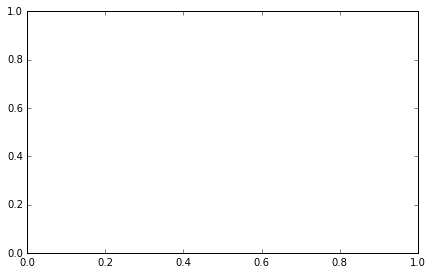

In [3]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

<h2>Class Structure</h2>
<p>The class FireGrid inherts CAGird.</p>

In [4]:
print(InfoDocString(FireGrid))

class FireGrid(CAGrid):
This class derives from CAGrid and changes update to make this a first simulation


In [5]:
print(InfoDocString(FireGrid.Update))

def Update(self):
Update rules for a simple fire simulation


In [6]:
print(not True)

False


<h2>Test a 3 x 3 Behavior</h2>
<h3>Checker Board</h3>
<p>The checker board pattern should be stable.  All cells have exactly two neighbors.</p>

In [7]:
rows = 3
columns = 3
MyGrid=FireGrid((rows,columns),MyDtype)
init(MyGrid,rows,columns)
MyAxes.imshow(MyGrid['Value'])
MyFigure
print(MyGrid['Tree'])
print(MyGrid['Burning'])
print(MyGrid['Value'])

[[ True  True False]
 [ True  True  True]
 [ True  True  True]]
[[False False False]
 [False  True False]
 [ True False False]]
[[[ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 1.  1.  1.]]

 [[ 0.  0.  1.]
  [ 1.  0.  0.]
  [ 0.  0.  1.]]

 [[ 1.  0.  0.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]]]


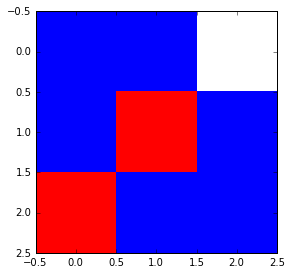

In [8]:
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

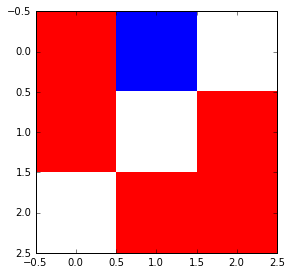

In [9]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

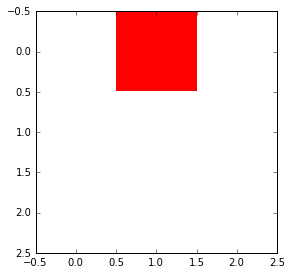

In [10]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

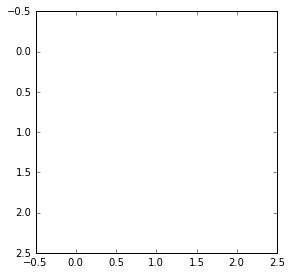

In [11]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

<h2>Small Grid Animation Test</h2>

In [28]:
def uf():
    MyGrid.Update()
    MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
    MyFigure

In [29]:
def af(n):
    uf()

In [14]:
def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = random() * 4
            if random() < 0.75:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = random() < 0.01
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

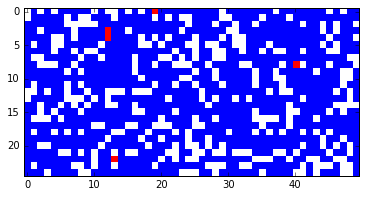

In [15]:
rows = 25
columns = 50
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [16]:
AnimationFrames = 50  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 2.5 seconds long.


In [17]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h2>Large Grid Simulations</h2>
<h3>Simulation 01</h3>

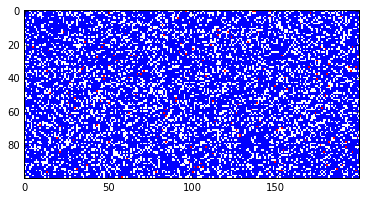

In [31]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [32]:
AnimationFrames = 200  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 10.0 seconds long.


In [33]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 02</h3>

In [ ]:
rows = 75
columns = 115
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.SetValue()
MyGrid.SetBoundary()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [ ]:
AnimationFrames = 600  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

In [ ]:
MyAnimationB = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimationB

In [ ]:
MyAnimationC = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimationC